In [33]:
import yaml
import pandas as pd
from pathlib import Path
PIs = []
for exp in ['a0eo-LUMI-G','a0er-LUMI-C']:
    for member in [f'fc{i}' for i in range(10)]:
        PI_yml = yaml.safe_load(Path(f'out/{exp}/YAML/{member}.yml').read_text())
        for var in PI_yml.keys():
            for season in ['ALL', 'DJF', 'JJA']:
                for region in ['Global', 'North Midlat', 'Tropical', 'South Midlat']:
                    PIs.append({ 'experiment' : exp,'member' : member, 'var' : var, 'season' : season, 'region' : region, 'PI score' : PI_yml[var][season][region]})
    
df_PI = pd.DataFrame(PIs)
    

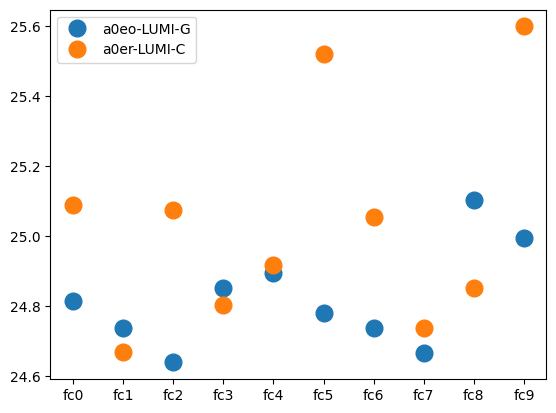

In [34]:
import matplotlib.pyplot as plt

df_new = df_PI[(df_PI['var'] == 'tas') & (df_PI['season'] == 'ALL') & (df_PI['region'] == 'Global')]

groups = df_new.groupby('experiment')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['member'], group['PI score'], marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [28]:
import xarray as xr
import matplotlib.pyplot as plt

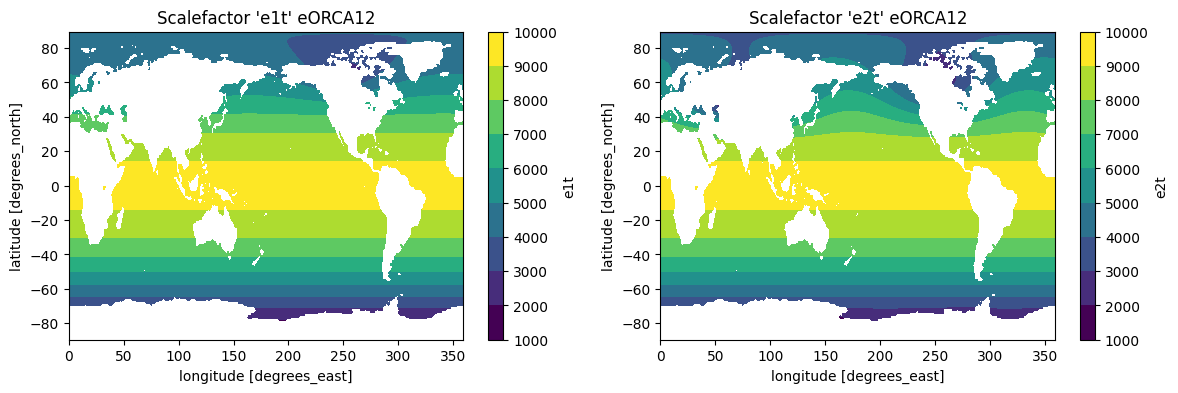

In [40]:
t_scalefactors_eo12 = xr.load_dataset('/pfs/lustrep3/scratch/project_465000454/kkeller/lab/scratch/eo12_scale_t.nc')
t_mask_eo12 = xr.load_dataset('/pfs/lustrep3/scratch/project_465000454/kkeller/lab/scratch/mask_1x1.nc')
#t_mask_eo12.isel(time_counter=0,nav_lev=0).tmask.plot()
#t_sf_eo12.e1t.isel(time_counter=0).plot()

fig, axis = plt.subplots(1,2, figsize=(14,4), dpi=100)

t_scalefactors_eo12.where(t_mask_eo12.tmask.isel(time_counter=0,nav_lev=0) > 0).e1t.isel(time_counter=0).plot.contourf(add_colorbar=True,levels=10,ax=axis[0])
axis[0].title.set_text("Scalefactor 'e1t' eORCA12")
t_scalefactors_eo12.where(t_mask_eo12.tmask.isel(time_counter=0,nav_lev=0) > 0).e2t.isel(time_counter=0).plot.contourf(add_colorbar=True,levels=10,ax=axis[1])
axis[1].title.set_text("Scalefactor 'e2t' eORCA12")

plt.savefig('/pfs/lustrep3/scratch/project_465000454/kkeller/lab/scratch/eo12_resolution.png')
#t_mask_eo12

In [ ]:
fig, axis = plt.subplots(2,2, figsize=(8,8), dpi=100, subplot_kw=dict(projection=map_projection))


for i,ax in enumerate(axis.flatten()):
    air.isel(time=i).plot(ax=ax,
    transform=ccrs.PlateCarree())